
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: November 9, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Samir Epili (se7982)
2. Siddhant Chauhan (sc54788)

# Question 1 (20 pts) - Principal Component Analysis

Download dataset from [this link](https://drive.google.com/file/d/1U6FDSQQSUzvw3Ygtgp8I5ea0-dL-orSE/view?usp=sharing).


In this problem we will be applying PCA on the Lending Club loan dataset. A simplified version of the dataset with reduced number of samples. Please use the dataset in the above link. We will use reduced number of features and only two classes as shown below.

In [ ]:
import os, sys, re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
import os, sys, re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Load the csv file and fill Nan/empty values as 0
dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

# We will be using only two classes and group them as below
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

# Set of features which indicate the dimensionality of the data
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]

#For simplicity, in this question, we select all columns that do not contain integer of float type of data. Then, one hot encoding is performed.
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)

df.shape

# We select the `loan_status` column as the target column.  

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(215168, 161)

Use Principal Component Analysis (PCA) to solve this problem.  

* **1.1 (1 pt)** Perform the following steps to prepare the dataset:

    * Select the 'loan_status' column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 25% data in test set and random_state = 42

    * Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    Note: X should have 160 features.
    

* **1.2 (8 pts)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X to the following components: 100, 30, 10. For each of the three models, print the percentage(%) of variance captured by each of the compnonets and plot the scree plot the [scree plot]
(https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/).  (PCA should be fit only on X_train).


* **1.3 (5 pts)** Train LogisticRegression(random_state=4,max_iter=10000) with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (Note: you will be training logistic regression 4 times (160, 100, 30 and 10 dimensional X) and will print 4 classification reports)


* **1.4 (4 pts)** [Plot](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py) the ROC curves for all models (trained using dataset containing all dimensions and dataset containing reduced dimensions, total 4 models). ROC curve is used to study the classifier's output. Details on ROC can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).


* **1.5 (2 pts)** What do you observe from the ROC curves? 

# ANSWER

### 1.1

In [ ]:
# create target vector and feature df

y = df['loan_status']
X = df.drop(['loan_status'], axis = 1)

# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

# Min-Max scale

X_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X.shape

(215168, 160)

### 1.2

[0.09211418 0.07009276 0.06045083 0.05496552 0.0492558  0.04580454
 0.03860862 0.0338191  0.03209179 0.02889044 0.0280736  0.02294968
 0.02228622 0.01828229 0.01591051 0.01498474 0.01266153 0.01231522
 0.01182307 0.01167729 0.01084898 0.01058959 0.01046895 0.0101013
 0.00973771 0.0097025  0.00954577 0.00927991 0.00914152 0.008431
 0.00831914 0.00807563 0.00797328 0.00789497 0.00750576 0.00711636
 0.00697311 0.00693923 0.00692356 0.00666866 0.00576517 0.00559573
 0.00535631 0.00506116 0.0049192  0.00489664 0.00484555 0.00449859
 0.0044659  0.0040058  0.00391758 0.00382529 0.00377497 0.00367606
 0.00366741 0.00348811 0.00347662 0.00336327 0.00322076 0.00303854
 0.00278793 0.00249429 0.00247372 0.00245085 0.00242168 0.00236372
 0.00230861 0.00226449 0.00208046 0.00205233 0.00197096 0.00187861
 0.00169893 0.00165834 0.00158329 0.00150387 0.00145364 0.00143029
 0.00138945 0.00132436 0.00132005 0.00128579 0.00126712 0.00120687
 0.00119567 0.00109651 0.00102773 0.00100716 0.00100511 0.0009421

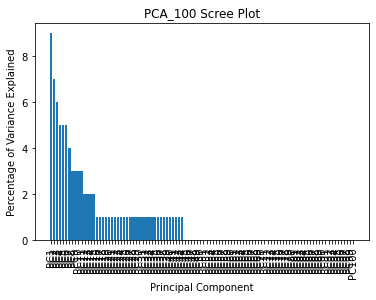

In [ ]:
# function to generate PCA labels

def labels(n_comp):
    col_names = []
    for i in range(1,n_comp+1):
        col_names.append('PC'+ str(i))
    return col_names

# 100 component PCA

pca_100 = PCA(n_components=100)
pca_100_train = pca_100.fit_transform(X_train_scaled)
pca_100_test = pca_100.transform(X_test_scaled)

print(pca_100.explained_variance_ratio_)

percent_variance = np.round(pca_100.explained_variance_ratio_* 100)
columns = labels(100)
plt.bar(x= range(1,101), height=percent_variance, tick_label=columns)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA_100 Scree Plot')
plt.show()

[0.09211418 0.07009276 0.06045083 0.05496552 0.0492558  0.04580453
 0.03860862 0.03381909 0.03209178 0.02889041 0.02807358 0.02294963
 0.02228608 0.01828154 0.01590944 0.01497963 0.0126576  0.01230861
 0.01180162 0.01164976 0.0108278  0.01057579 0.01044632 0.01007181
 0.00972318 0.00965525 0.00951115 0.00923314 0.00900519 0.00831895]


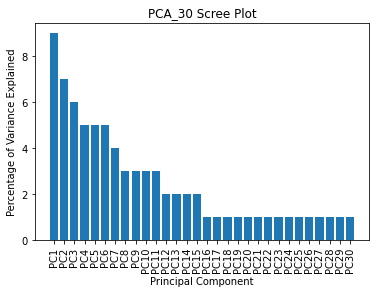

In [ ]:
# 30 component PCA

pca_30 = PCA(n_components=30)
pca_30_train = pca_30.fit_transform(X_train_scaled)
pca_30_test = pca_30.transform(X_test_scaled)

print(pca_30.explained_variance_ratio_)

percent_variance = np.round(pca_30.explained_variance_ratio_* 100)
columns = labels(30)
plt.bar(x= range(1,31), height=percent_variance, tick_label=columns)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA_30 Scree Plot')
plt.show()

[0.09211418 0.07009276 0.06045083 0.05496552 0.0492558  0.04580454
 0.03860862 0.0338191  0.03209179 0.02889044]


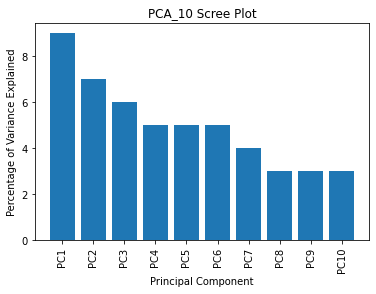

In [ ]:
# 10 component PCA

pca_10 = PCA(n_components=10)
pca_10_train = pca_10.fit_transform(X_train_scaled)
pca_10_test = pca_10.transform(X_test_scaled)

print(pca_10.explained_variance_ratio_)

percent_variance = np.round(pca_10.explained_variance_ratio_* 100)
columns = labels(10)
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA_10 Scree Plot')
plt.show()

### 1.3

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lrm = LogisticRegression(random_state=4,max_iter=10000).fit(X_train_scaled, y_train)
lrm_pred_160 = lrm.predict(X_train_scaled)
lrm_test_160 = lrm.predict(X_test_scaled)

lrm_100 = LogisticRegression(random_state=4,max_iter=10000).fit(pca_100_train, y_train)
lrm_pred_100 = lrm_100.predict(pca_100_train)
lrm_test_100 = lrm_100.predict(pca_100_test)

lrm_30 = LogisticRegression(random_state=4,max_iter=10000).fit(pca_30_train, y_train)
lrm_pred_30 = lrm_30.predict(pca_30_train)
lrm_test_30 = lrm_30.predict(pca_30_test)

lrm_10 = LogisticRegression(random_state=4,max_iter=10000).fit(pca_10_train, y_train)
lrm_pred_10 = lrm_10.predict(pca_10_train)
lrm_test_10 = lrm_10.predict(pca_10_test)

In [ ]:
# not sure which 4 to print

target_names = ['0', '1']
# print(classification_report(y_test, lrm_test_160, target_names=target_names))
# print(classification_report(y_test, lrm_test_100, target_names=target_names))
# print(classification_report(y_test, lrm_test_30, target_names=target_names))
# print(classification_report(y_test, lrm_test_10, target_names=target_names))

print(classification_report(y_train, lrm_pred_160, target_names=target_names))
print(classification_report(y_train, lrm_pred_100, target_names=target_names))
print(classification_report(y_train, lrm_pred_30, target_names=target_names))
print(classification_report(y_train, lrm_pred_10, target_names=target_names))

              precision    recall  f1-score   support

           0       0.78      0.48      0.59      2300
           1       0.99      1.00      1.00    159076

    accuracy                           0.99    161376
   macro avg       0.89      0.74      0.79    161376
weighted avg       0.99      0.99      0.99    161376

              precision    recall  f1-score   support

           0       0.51      0.05      0.08      2300
           1       0.99      1.00      0.99    159076

    accuracy                           0.99    161376
   macro avg       0.75      0.52      0.54    161376
weighted avg       0.98      0.99      0.98    161376

              precision    recall  f1-score   support

           0       0.31      0.05      0.08      2300
           1       0.99      1.00      0.99    159076

    accuracy                           0.98    161376
   macro avg       0.65      0.52      0.54    161376
weighted avg       0.98      0.98      0.98    161376

              preci

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.4

Text(0.5, 1.0, '10 Feature PCA ROC Curve')

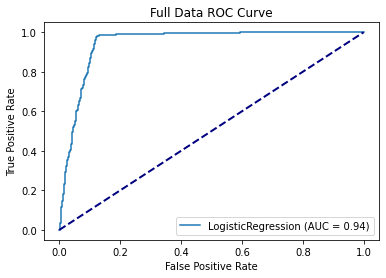

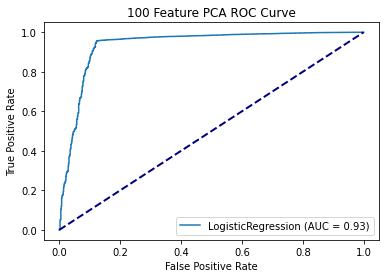

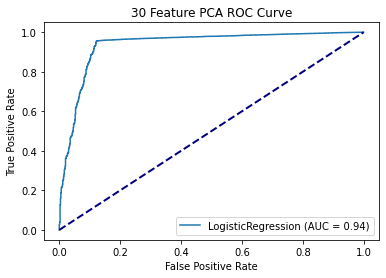

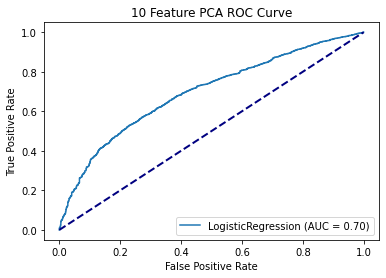

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve

lrm_disp = plot_roc_curve(lrm, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Full Data ROC Curve')

lrm_100_disp = plot_roc_curve(lrm_100, pca_100_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('100 Feature PCA ROC Curve')

lrm_30_disp = plot_roc_curve(lrm_30, pca_30_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('30 Feature PCA ROC Curve')

lrm_10_disp = plot_roc_curve(lrm_10, pca_10_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('10 Feature PCA ROC Curve')

### 1.5


The ROC curves show that as the number of dimensions are reduced by PCA, the area under the curve (AUC) and steepness of the curves decreases. This occurs likely because PCA, in creating a subspace to capture the most variance in the data, causes the models to suffer from lowered specificity as the false positive rate increases with fewer components. For the model trained with the full data, the AUC is 0.95 which means that there is a 95% chance that a randomly selected positive point is ranked higher than a randomly selected negative point.

# Question 2 (20 pts)- Decision Tree Classifier
Download dataset from [this link](https://drive.google.com/file/d/1iWh0gF2bXOYSnuq843qLxnFphT1HN-lq/view?usp=sharing).

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [ ]:
# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [ ]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [ ]:
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,-1.0


In [ ]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build a decision tree with depths 2,5,10,20 and max depth using gini and entropy criterion; report the train and test error. Refer [Decisison Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. **(2 pts)** Explain how the train and test accuracy varies as we increase the depth of the tree.

c. **(4 pts)** List the most important features for the tree with depth=2 and criterion=gini and plot the tree. Name this tree model as `dt2`.

d. **(6 pts)** Report the accuracy and AUC for the test data and plot the ROC curve using `dt2`.


# Answer 2
## (a)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_2_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 2).fit(X_train, Y_train)
dt_5_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 5).fit(X_train, Y_train)
dt_10_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 10).fit(X_train, Y_train)
dt_20_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 20).fit(X_train, Y_train)

dt_2_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2).fit(X_train, Y_train)
dt_5_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5).fit(X_train, Y_train)
dt_10_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10).fit(X_train, Y_train)
dt_20_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20).fit(X_train, Y_train)

dt_2_gini_tre = dt_2_gini.score(X_train, Y_train)
dt_5_gini_tre = dt_5_gini.score(X_train, Y_train)
dt_10_gini_tre = dt_10_gini.score(X_train, Y_train)
dt_20_gini_tre = dt_20_gini.score(X_train, Y_train)

dt_2_entropy_tre = dt_2_entropy.score(X_train, Y_train)
dt_5_entropy_tre = dt_5_entropy.score(X_train, Y_train)
dt_10_entropy_tre = dt_10_entropy.score(X_train, Y_train)
dt_20_entropy_tre = dt_20_entropy.score(X_train, Y_train)

dt_2_gini_te = dt_2_gini.score(X_test, Y_test)
dt_5_gini_te = dt_5_gini.score(X_test, Y_test)
dt_10_gini_te = dt_10_gini.score(X_test, Y_test)
dt_20_gini_te = dt_20_gini.score(X_test, Y_test)

dt_2_entropy_te = dt_2_entropy.score(X_test, Y_test)
dt_5_entropy_te = dt_5_entropy.score(X_test, Y_test)
dt_10_entropy_te = dt_10_entropy.score(X_test, Y_test)
dt_20_entropy_te = dt_20_entropy.score(X_test, Y_test)

print('Gini:')
print('Depth = 2:')
print('Train Error = ', dt_2_gini_tre)
print('Test Error = ', dt_2_gini_te)
print('Depth = 5:')
print('Train Error = ', dt_5_gini_tre)
print('Test Error = ', dt_5_gini_te)
print('Depth = 10:')
print('Train Error = ', dt_10_gini_tre)
print('Test Error = ', dt_10_gini_te)
print('Depth = 20:')
print('Train Error = ', dt_20_gini_tre)
print('Test Error = ', dt_20_gini_te)

print('\nEntropy:')
print('Depth = 2:')
print('Train Error = ', dt_2_entropy_tre)
print('Test Error = ', dt_2_entropy_te)
print('Depth = 5:')
print('Train Error = ', dt_5_entropy_tre)
print('Test Error = ', dt_5_entropy_te)
print('Depth = 10:')
print('Train Error = ', dt_10_entropy_tre)
print('Test Error = ', dt_10_entropy_te)
print('Depth = 20:')
print('Train Error = ', dt_20_entropy_tre)
print('Test Error = ', dt_20_entropy_te)

Gini:
Depth = 2:
Train Error =  0.7285250307985217
Test Error =  0.7268248992386923
Depth = 5:
Train Error =  0.7976257139657297
Test Error =  0.7760859829825347
Depth = 10:
Train Error =  0.8633665584051966
Test Error =  0.7886251679355127
Depth = 20:
Train Error =  0.984320752603875
Test Error =  0.7447380206000895

Entropy:
Depth = 2:
Train Error =  0.7119498264083324
Test Error =  0.7089117778772951
Depth = 5:
Train Error =  0.7998656064508903
Test Error =  0.7783251231527094
Depth = 10:
Train Error =  0.8501511927427483
Test Error =  0.7913121361397224
Depth = 20:
Train Error =  0.9647216933587188
Test Error =  0.7398119122257053


## (b)



The highest train accuracies occur with depth 20 trees, while the highest train accuracies occur with depth 10 trees. This is likely because depth 20 trees overfit the training data which causes the test accuracy to suffer. Further, using the gini criterion provides more accurate models than when using the entropy criterion.

# (c)

Important Features:  ['duration', 'poutcome_other']


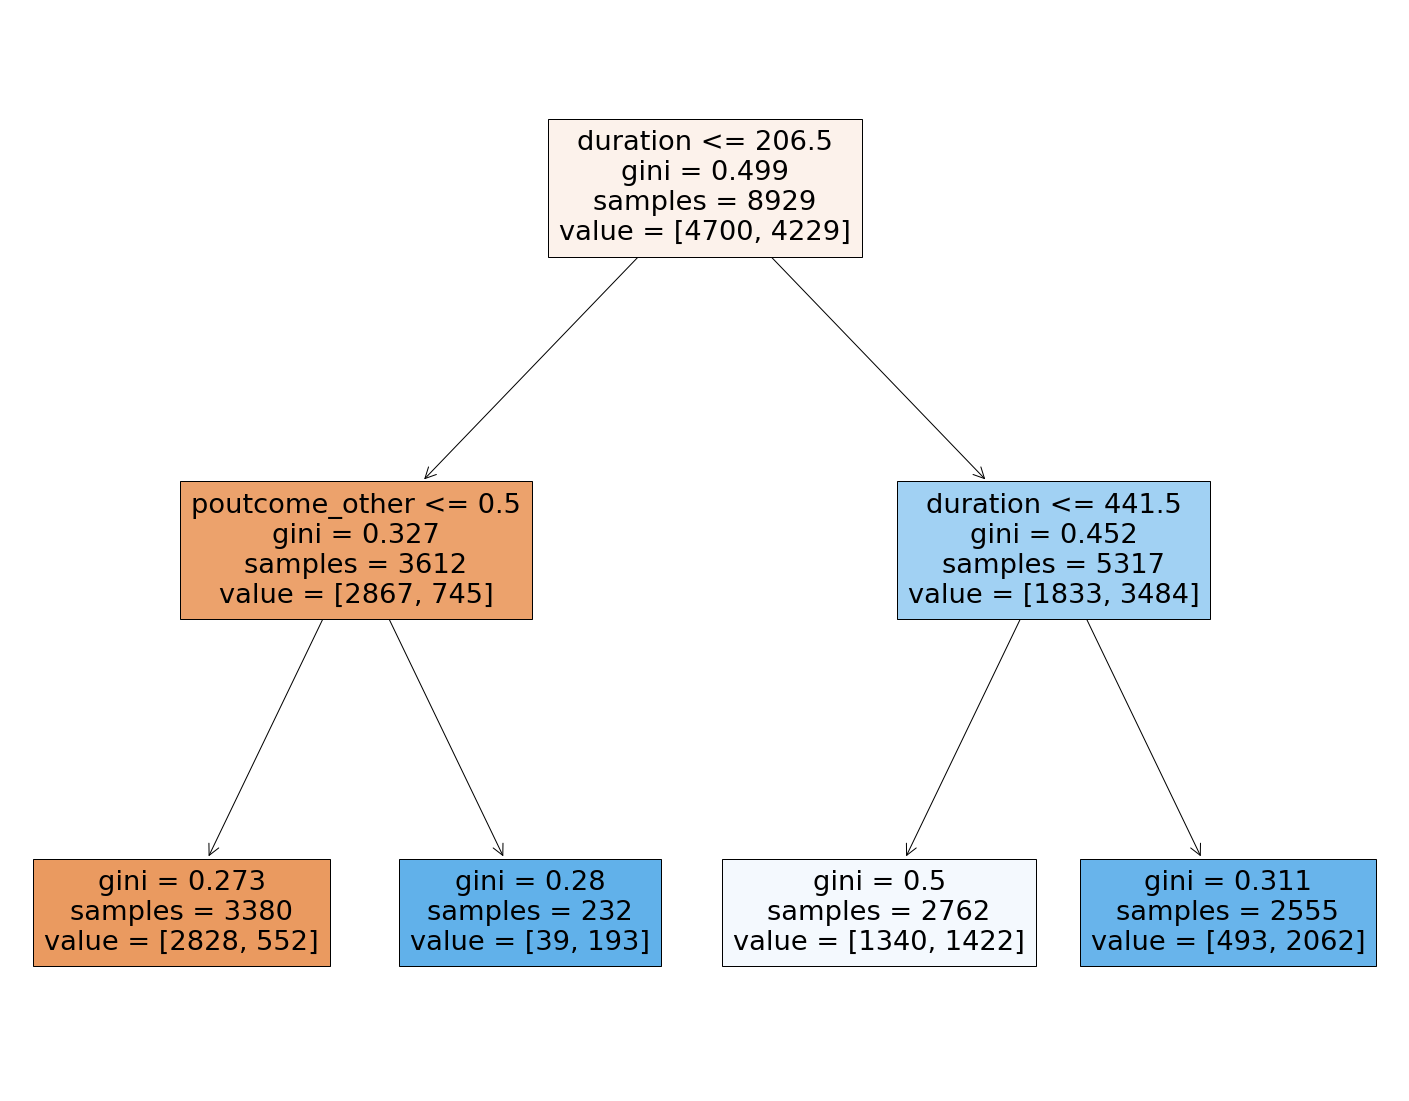

In [ ]:
dt2 = dt_2_gini
dt2.feature_importances_

def find_important_features(features, importance_array):
  feature_list = []

  i = 0
  while i < len(importance_array):
    if importance_array[i] > 0:
      feature_list.append(features[i])
    i+=1
  return feature_list     

print('Important Features: ', find_important_features(bank_data.columns, dt2.feature_importances_))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt2, feature_names = bank_data.columns, filled = True)

# yes - subscribed term deposit
# no -has not subscribed term deposit

## (d)

dt2 Test Error:  0.7268248992386923


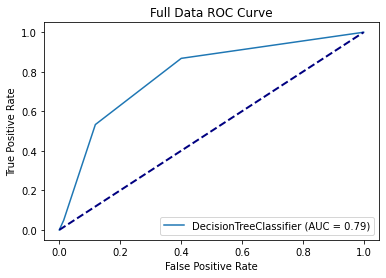

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve

print('dt2 Test Error: ', dt2.score(X_test, Y_test) )

dt2_disp = plot_roc_curve(dt2, X_test, Y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Full Data ROC Curve')
plt.show()

# Question 3 (15 pts) - Pipeline Implementation from Sklearn 

In this question we will build a pipeline to streamline the ML Workflow. Instead of writing code for each logic, pipelines allow to make modeling easy by removing repeated operations. Generally we define the structure of the pipeline, to include the following steps, data pre-processing, feature selection, model building. 

**Part A (5 pts)**

 * Load the dataset from "vehicle.csv". The target variable is denoted by column_name = 'class'. Print the label class,and perform [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) on them using sklearn.preprocessing.LabelEncoder.

 * Seperate the dataset into features,labels. Split the dataset into train and test set with 20% data in test set and random_state = 50

**Part B (5 pts)**

Now, we will build [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with the following steps. Remeber to fit the pipeline on training set and predict on test set. Finally report the classification accuracy on the test set.

 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * Model : Use DecisionTreeClassifier with default values
  

**Part C (5 pts)**
  
In part C, we will build on top of the previous part B. In addition to the three steps we will add PCA to the pipeline and use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best parameters for PCA(number of components) and DecisionTree(max_depth).
  
 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * PCA : Use PCA()
 * Model : Use DecisionTreeClassifier with default values
  
We will now use [GridSearchCV] with default values(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to estimate best parameters for pca(n_components = [5,8,10]) and Decision Tree (max_depth = [3,5,15]) using the pipeline designed. 

* **Hint:** The `param_grid` argument to gridsearch will be given as `{param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}}`. 

Print the best parameters found by gridsearch. Finally, update the best parameters to the pipeline using pipe_pca.set_params("best params from gridsearchCV"), and report the classification accuracy on test set.

              

#### Part A


In [ ]:
from sklearn import preprocessing


df = pd.read_csv('vehicle.csv')
df.columns.array



<PandasArray>
[                'compactness',                 'circularity',
        'distance_circularity',                'radius_ratio',
        'pr.axis_aspect_ratio',     'max.length_aspect_ratio',
               'scatter_ratio',               'elongatedness',
      'pr.axis_rectangularity',   'max.length_rectangularity',
             'scaled_variance',           'scaled_variance.1',
   'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
              'skewness_about',            'skewness_about.1',
            'skewness_about.2',               'hollows_ratio',
                       'class']
Length: 19, dtype: object

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df['class'])
df['class']=le.fit_transform(df['class'])

X = df.drop('class', 1)
Y = df['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

#### Part B

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:

pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),('DecisionTreeClassifier', DecisionTreeClassifier())])
pipe.fit(X_train, Y_train)
print(classification_report(Y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.94      0.90      0.92        91
           2       0.84      0.92      0.88        39

    accuracy                           0.91       170
   macro avg       0.89      0.91      0.90       170
weighted avg       0.91      0.91      0.91       170



In [ ]:
print(pipe.score(X_test, Y_test)) # report the score on test

0.9058823529411765


#### Part C

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
second_pipe = Pipeline(steps=[('imputer',SimpleImputer(missing_values=np.nan, strategy='mean')),
                              ('scaler', StandardScaler()),
                              ('pca', PCA()),('DecisionTreeClassifier', DecisionTreeClassifier())])


In [ ]:
grid_feats = {
    'pca__n_components': [5, 8, 10],
    'DecisionTreeClassifier__max_depth': [3, 5, 15],
}

In [ ]:
grid = GridSearchCV(second_pipe, param_grid=grid_feats)

# fit to the data

grid.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=N

In [ ]:
grid.best_params_

{'DecisionTreeClassifier__max_depth': 15, 'pca__n_components': 10}

In [ ]:
# Using the max depth of 15 and pca components of 10

second_pipe.set_params(DecisionTreeClassifier__max_depth=15, pca__n_components=10)


second_pipe.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('DecisionTreeClassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=15,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_l

In [ ]:
print(classification_report(Y_test, second_pipe.predict(X_test)))
result = (second_pipe.score(X_test, Y_test))

print(result)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        40
           1       0.89      0.88      0.88        91
           2       0.75      0.85      0.80        39

    accuracy                           0.84       170
   macro avg       0.81      0.82      0.81       170
weighted avg       0.84      0.84      0.84       170

0.8352941176470589


# Question 4 (15pts) - Reject option

Consider a binary classification problem with the following loss matrix - where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$

Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ where c = 1

p = P(C1|x)

1 - p = P(C2|x)

#### Loss for C1 and C2

C1 loss = 2 ( 1 - p )
C2 loss = 3 ( p )

#### rejection


Reject loss = cp + c ( 1 - p ) = c

if c = 1: C1 loss versus reject loss:

  1 = 2 - 2p -> p = 0.5 or 1/2

C2 loss versus reject loss: 1 = 3p => p = 0.33 or 1/3

if 1/3 <= p <= 1/2 then choose reject, the loss of 1 is less than the loss of C1 or the loss of C2

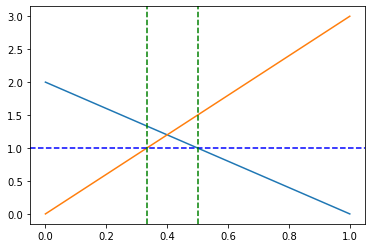

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure()
ax = plt.axes()

p = np.linspace(0,1)
y1 = 2-2*p
y2 = 3*p

ax.plot(p, y1)
ax.plot(p, y2)
ax.axhline(y=1, color = "b", linestyle = "--")
ax.axvline(x = 1/3, color = "green", linestyle = "--")
ax.axvline(x = 1/2, color = "green", linestyle = "--")


# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (7th topic onwards, i.e. "stochastic gradient descent" onwards). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 7, write 7A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

### 12A

The notes describe the topics of Feature selection and feature extraction

The group clearly presented the information in a structured manner by first giving a summary of highlights of the lecture then going into deatils into feature selection and feature enxtraction. They split the different ways to within each topic by using examples to justify the theory behind each concept to help apply the learnings to real world situations

The notes can be improved by adding more visual elements to the notes and/or linking to youtube videos that show the process of feature extraction and feature selection occurring. There were examples for concepts which had links to website to test out different methods and see them in a visual manner.